### Topics

- Subsetting and sorting
- Adding new columns
- Aggregating and grouping
- Summary Statistics
- Indexing
- Slicing
- Visualizations

## Transforming DataFrames

In [1]:
import pandas as pd

In [2]:
homelessness = pd.read_csv('../data/pandas_datasets/homelessness.csv')

In [3]:
# First five rows of the dataset
homelessness.head(5)

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


In [4]:
# number of rows and columns of the DataFrame.
homelessness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   region          51 non-null     object 
 2   state           51 non-null     object 
 3   individuals     51 non-null     float64
 4   family_members  51 non-null     float64
 5   state_pop       51 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB


In [5]:
# Number of rows and columns of the DataFrame
print(homelessness.shape)

(51, 6)


In [6]:
# Summary Statistics
print(homelessness.describe())

       Unnamed: 0    individuals  family_members     state_pop
count   51.000000      51.000000       51.000000  5.100000e+01
mean    25.000000    7225.784314     3504.882353  6.405637e+06
std     14.866069   15991.025083     7805.411811  7.327258e+06
min      0.000000     434.000000       75.000000  5.776010e+05
25%     12.500000    1446.500000      592.000000  1.777414e+06
50%     25.000000    3082.000000     1482.000000  4.461153e+06
75%     37.500000    6781.500000     3196.000000  7.340946e+06
max     50.000000  109008.000000    52070.000000  3.946159e+07


**i. Parts of a DataFrame**

To better understand DataFrame objects, it's useful to know that they consist of three components, stored as attributes:

- .values: A two-dimensional NumPy array of values.
- .columns: An index of columns: the column names.
- .index: An index for the rows: either row numbers or row names.
- 
Indexes can be thought of as a list of strings or numbers, though the pandas Index data type allows for more sophisticated options. 

In [7]:
print(homelessness.values)

[[0 'East South Central' 'Alabama' 2570.0 864.0 4887681]
 [1 'Pacific' 'Alaska' 1434.0 582.0 735139]
 [2 'Mountain' 'Arizona' 7259.0 2606.0 7158024]
 [3 'West South Central' 'Arkansas' 2280.0 432.0 3009733]
 [4 'Pacific' 'California' 109008.0 20964.0 39461588]
 [5 'Mountain' 'Colorado' 7607.0 3250.0 5691287]
 [6 'New England' 'Connecticut' 2280.0 1696.0 3571520]
 [7 'South Atlantic' 'Delaware' 708.0 374.0 965479]
 [8 'South Atlantic' 'District of Columbia' 3770.0 3134.0 701547]
 [9 'South Atlantic' 'Florida' 21443.0 9587.0 21244317]
 [10 'South Atlantic' 'Georgia' 6943.0 2556.0 10511131]
 [11 'Pacific' 'Hawaii' 4131.0 2399.0 1420593]
 [12 'Mountain' 'Idaho' 1297.0 715.0 1750536]
 [13 'East North Central' 'Illinois' 6752.0 3891.0 12723071]
 [14 'East North Central' 'Indiana' 3776.0 1482.0 6695497]
 [15 'West North Central' 'Iowa' 1711.0 1038.0 3148618]
 [16 'West North Central' 'Kansas' 1443.0 773.0 2911359]
 [17 'East South Central' 'Kentucky' 2735.0 953.0 4461153]
 [18 'West South Cen

In [8]:
print(homelessness.columns)


Index(['Unnamed: 0', 'region', 'state', 'individuals', 'family_members',
       'state_pop'],
      dtype='object')


In [9]:
print(homelessness.index)

RangeIndex(start=0, stop=51, step=1)


**ii. Sorting and Subsetting**

In [10]:
# Sort homelessness by individuals
homelessness_ind = homelessness.sort_values('individuals', ascending = True)

# Print the top few rows
print(homelessness_ind.head())

    Unnamed: 0              region         state  individuals  family_members  \
50          50            Mountain       Wyoming        434.0           205.0   
34          34  West North Central  North Dakota        467.0            75.0   
7            7      South Atlantic      Delaware        708.0           374.0   
39          39         New England  Rhode Island        747.0           354.0   
45          45         New England       Vermont        780.0           511.0   

    state_pop  
50     577601  
34     758080  
7      965479  
39    1058287  
45     624358  


In [11]:
# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values('family_members', ascending=False)

print(homelessness_fam.head())

    Unnamed: 0              region          state  individuals  \
32          32        Mid-Atlantic       New York      39827.0   
4            4             Pacific     California     109008.0   
21          21         New England  Massachusetts       6811.0   
9            9      South Atlantic        Florida      21443.0   
43          43  West South Central          Texas      19199.0   

    family_members  state_pop  
32         52070.0   19530351  
4          20964.0   39461588  
21         13257.0    6882635  
9           9587.0   21244317  
43          6111.0   28628666  


In [12]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(['region', 'family_members'], ascending = [True, False])

# Print the top few rows
print(homelessness_reg_fam.head())

    Unnamed: 0              region      state  individuals  family_members  \
13          13  East North Central   Illinois       6752.0          3891.0   
35          35  East North Central       Ohio       6929.0          3320.0   
22          22  East North Central   Michigan       5209.0          3142.0   
49          49  East North Central  Wisconsin       2740.0          2167.0   
14          14  East North Central    Indiana       3776.0          1482.0   

    state_pop  
13   12723071  
35   11676341  
22    9984072  
49    5807406  
14    6695497  


In [13]:
# Select the individuals column
individuals = homelessness['individuals']

print(individuals.head())

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64


In [14]:
# Select the state and family_members columns
state_fam = homelessness[['state', 'family_members']]

print(state_fam.head())

        state  family_members
0     Alabama           864.0
1      Alaska           582.0
2     Arizona          2606.0
3    Arkansas           432.0
4  California         20964.0


In [15]:
# Select only the individuals and state columns, in that order
ind_state = homelessness[['individuals', 'state']]

print(ind_state.head())

   individuals       state
0       2570.0     Alabama
1       1434.0      Alaska
2       7259.0     Arizona
3       2280.0    Arkansas
4     109008.0  California


In [16]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness['individuals'] > 10000]

# See the result
print(ind_gt_10k)

    Unnamed: 0              region       state  individuals  family_members  \
4            4             Pacific  California     109008.0         20964.0   
9            9      South Atlantic     Florida      21443.0          9587.0   
32          32        Mid-Atlantic    New York      39827.0         52070.0   
37          37             Pacific      Oregon      11139.0          3337.0   
43          43  West South Central       Texas      19199.0          6111.0   
47          47             Pacific  Washington      16424.0          5880.0   

    state_pop  
4    39461588  
9    21244317  
32   19530351  
37    4181886  
43   28628666  
47    7523869  


In [17]:
# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness['region'] == 'Mountain']

# See the result
print(mountain_reg)

    Unnamed: 0    region       state  individuals  family_members  state_pop
2            2  Mountain     Arizona       7259.0          2606.0    7158024
5            5  Mountain    Colorado       7607.0          3250.0    5691287
12          12  Mountain       Idaho       1297.0           715.0    1750536
26          26  Mountain     Montana        983.0           422.0    1060665
28          28  Mountain      Nevada       7058.0           486.0    3027341
31          31  Mountain  New Mexico       1949.0           602.0    2092741
44          44  Mountain        Utah       1904.0           972.0    3153550
50          50  Mountain     Wyoming        434.0           205.0     577601


In [18]:
# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness['region'] == 'Pacific') & (homelessness['family_members'] < 1000)]

# See the result
print(fam_lt_1k_pac)

   Unnamed: 0   region   state  individuals  family_members  state_pop
1           1  Pacific  Alaska       1434.0           582.0     735139


In [19]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness['state'].isin(canu)]

# See the result
print(mojave_homelessness)

    Unnamed: 0    region       state  individuals  family_members  state_pop
2            2  Mountain     Arizona       7259.0          2606.0    7158024
4            4   Pacific  California     109008.0         20964.0   39461588
28          28  Mountain      Nevada       7058.0           486.0    3027341
44          44  Mountain        Utah       1904.0           972.0    3153550


**iii. Adding new columns**

In [20]:
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]

In [21]:
# Add total col as sum of individuals and family_members
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]

# Add p_homeless col as proportion of total homeless population to the state population
homelessness['p_homeless'] = homelessness['total']/homelessness['state_pop']

# See the result
print(homelessness)

    Unnamed: 0              region                 state  individuals  \
0            0  East South Central               Alabama       2570.0   
1            1             Pacific                Alaska       1434.0   
2            2            Mountain               Arizona       7259.0   
3            3  West South Central              Arkansas       2280.0   
4            4             Pacific            California     109008.0   
5            5            Mountain              Colorado       7607.0   
6            6         New England           Connecticut       2280.0   
7            7      South Atlantic              Delaware        708.0   
8            8      South Atlantic  District of Columbia       3770.0   
9            9      South Atlantic               Florida      21443.0   
10          10      South Atlantic               Georgia       6943.0   
11          11             Pacific                Hawaii       4131.0   
12          12            Mountain                 

In [22]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * (homelessness['individuals'] / homelessness['state_pop'])

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness['indiv_per_10k'] > 20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k', ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[['state','indiv_per_10k']]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


District of Columbia has the highest number of homeless individuals - almost 54 per ten thousand people. This is almost double the number of the next-highest state, Hawaii. 

## Aggregating DataFrames

**Walmart Dataset:** Walmart stores is a chain of department stores in the US. The dataset contains weekly sales in US dollars in various stores. Each store has an ID number and a specific store type. The sales are also separated by department ID. Along with weekly sales, there is information about whether it was a holiday week or not, the average temperature during the week in that location, the average fuel price in dollars per liter that week, and the national unemployment rate that week.

Walmart distinguishes three types of stores: "**supercenters**," "**discount stores**," and "**neighborhood markets**," encoded in this dataset as type "A," "B," and "C."

In [23]:
import warnings

In [24]:
sales = pd.read_csv('../data/pandas_datasets/sales_subset.csv')

In [25]:
# Print the head of the sales DataFrame
print(sales.head())

   Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0           0      1    A           1  2010-02-05      24924.50       False   
1           1      1    A           1  2010-03-05      21827.90       False   
2           2      1    A           1  2010-04-02      57258.43       False   
3           3      1    A           1  2010-05-07      17413.94       False   
4           4      1    A           1  2010-06-04      17558.09       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  
3      22.527778              0.748928         7.808  
4      27.050000              0.714586         7.808  


In [26]:

# Print the info about the sales DataFrame
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales          10774 non-null  float64
 6   is_holiday            10774 non-null  bool   
 7   temperature_c         10774 non-null  float64
 8   fuel_price_usd_per_l  10774 non-null  float64
 9   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 768.2+ KB
None


In [27]:

# Print the mean of weekly_sales
print('Mean:',sales['weekly_sales'].mean())

# Print the median of weekly_sales
print('Median:',sales['weekly_sales'].median())

Mean: 23843.95014850566
Median: 12049.064999999999


The mean weekly sales amount is almost double the median weekly sales amount! This can tell us that there are a few very high sales weeks that are making the mean so much higher than the median.

In [28]:
# The date range our dataset covers

# Print the maximum of the date column
print('Max:', sales['date'].max())

# Print the minimum of the date column
print('Min:', sales['date'].min())

Max: 2012-10-26
Min: 2010-02-05


In this case, there are data from February of 2010 to October of 2012.

**Efficient summaries**

The .agg() method allows to apply custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making aggregations super-efficient. For example,

`df['column'].agg(function)`


In [29]:
# Import NumPy and create custom IQR function
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


/var/folders/jn/9nlkdx3s70bfdjtw_1q5jnvm0000gn/T/ipykernel_32465/448815662.py:7: FutureWarning: The provided callable <function median at 0x105afb6a0> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))
/var/folders/jn/9nlkdx3s70bfdjtw_1q5jnvm0000gn/T/ipykernel_32465/448815662.py:7: FutureWarning: The provided callable <function median at 0x105afb6a0> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))
/var/folders/jn/9nlkdx3s70bfdjtw_1q5jnvm0000gn/T/ipykernel_32465/448815662.py:7: FutureWarning: The provided callable <function median at 0x105afb6a0> is currently usin

**Cumulative statistics**

Cumulative statistics can be helpful in tracking summary statistics over time. We'll calculate the cumulative sum and cumulative max of a department's weekly sales, which will allow to identify what the total sales were so far as well as what the highest weekly sales were so far.

In [30]:
# sales_1_1 - A DataFrame called sales_1_1 contains the sales data for department 1 of store 1.

sales_1_1 = sales[(sales['department'] == 1) & (sales['store'] == 1)]

In [31]:
sales_1_1.head()

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [32]:
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values('date', ascending = True)

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

# See the columns calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

          date  weekly_sales  cum_weekly_sales  cum_max_sales
0   2010-02-05      24924.50          24924.50       24924.50
1   2010-03-05      21827.90          46752.40       24924.50
2   2010-04-02      57258.43         104010.83       57258.43
3   2010-05-07      17413.94         121424.77       57258.43
4   2010-06-04      17558.09         138982.86       57258.43
5   2010-07-02      16333.14         155316.00       57258.43
6   2010-08-06      17508.41         172824.41       57258.43
7   2010-09-03      16241.78         189066.19       57258.43
8   2010-10-01      20094.19         209160.38       57258.43
9   2010-11-05      34238.88         243399.26       57258.43
10  2010-12-03      22517.56         265916.82       57258.43
11  2011-01-07      15984.24         281901.06       57258.43


**Dropping duplicates**

In [33]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(['store', 'type'])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(['store', 'department'])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday'] == True].drop_duplicates('date')

# Print date col of holiday_dates
print(holiday_dates['date'])

      Unnamed: 0  store type  department        date  weekly_sales  \
0              0      1    A           1  2010-02-05      24924.50   
901          901      2    A           1  2010-02-05      35034.06   
1798        1798      4    A           1  2010-02-05      38724.42   
2699        2699      6    A           1  2010-02-05      25619.00   
3593        3593     10    B           1  2010-02-05      40212.84   

      is_holiday  temperature_c  fuel_price_usd_per_l  unemployment  
0          False       5.727778              0.679451         8.106  
901        False       4.550000              0.679451         8.324  
1798       False       6.533333              0.686319         8.623  
2699       False       4.683333              0.679451         7.259  
3593       False      12.411111              0.782478         9.765  
    Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0            0      1    A           1  2010-02-05      24924.50       False   

The holiday weeks correspond to the Superbowl in February, Labor Day in September, Thanksgiving in November, and Christmas in December. 

**Counting categorical variables**

In [34]:
# Count the number of stores of each type
store_counts = store_types['type'].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types['type'].value_counts(normalize = True)
print(store_props)

type
A    11
B     1
Name: count, dtype: int64
type
A    0.916667
B    0.083333
Name: proportion, dtype: float64


In [35]:

# Count the number of stores for each department and sort
dept_counts_sorted = store_depts['department'].value_counts()
print(dept_counts_sorted)

# Get the proportion of stores in each department and sort
dept_props_sorted = store_depts['department'].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

department
1     12
55    12
72    12
71    12
67    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: count, Length: 80, dtype: int64
department
1     0.012917
55    0.012917
72    0.012917
71    0.012917
67    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: proportion, Length: 80, dtype: float64


 Department 43 only exists in two stores.

**Grouped summary statistics**

What percent of sales occurred at each store type?

In [36]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


About 91% of sales occurred in stores of type A', 9% in stores of type B, and there are no sales records for stores of type C

In [37]:
# to see if sales differ by store type depending on if it's a holiday week or not.

# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(['type', 'is_holiday'])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


In [38]:
sales_propn_by_type_holiday = sales_by_type_is_holiday/ sum(sales_by_type_is_holiday)
print(sales_propn_by_type_holiday)

type  is_holiday
A     False         0.909683
      True          0.000092
B     False         0.090219
      True          0.000006
Name: weekly_sales, dtype: float64


In [39]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [40]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')["weekly_sales"].agg([np.min, np.max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[["unemployment", "fuel_price_usd_per_l"]].agg([np.min, np.max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

         min        max          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
     unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


The minimum `weekly_sales` is negative because some stores had more returns than sales.

**Pivot tables**

In [41]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values="weekly_sales", index="type")

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [42]:
# Import NumPy as np
import numpy as np

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales", index="type", aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08


In [43]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales", index="type",columns="is_holiday")

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


In [44]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0))

type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364   63236.875000
...                   ...            ...
95          123933.787121   77082.102500
96           21367.042857    9528.538333
97           28471.266970    5828.873333
98           12875.423182     217.428333
99             379.123659       0.000000

[80 rows x 2 columns]


In [45]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True))

# Note: The column 'All' returns an overall mean for each department, not (A+B)/2.
# (A+B)/2 would be a mean of means, rather than an overall mean per department!

type                   A              B           All
department                                           
1           30961.725379   44050.626667  32052.467153
2           67600.158788  112958.526667  71380.022778
3           17160.002955   30580.655000  18278.390625
4           44285.399091   51219.654167  44863.253681
5           34821.011364   63236.875000  37189.000000
...                  ...            ...           ...
96          21367.042857    9528.538333  20337.607681
97          28471.266970    5828.873333  26584.400833
98          12875.423182     217.428333  11820.590278
99            379.123659       0.000000    379.123659
All         23674.667242   25696.678370  23843.950149

[81 rows x 3 columns]


## Slicing and Indexing DataFrames

**Explicit indexes**

In [46]:
temperatures = pd.read_csv("../data/pandas_datasets/temperatures.csv", index_col=0)
temperatures

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547
...,...,...,...,...
16495,2013-05-01,Xian,China,18.979
16496,2013-06-01,Xian,China,23.522
16497,2013-07-01,Xian,China,25.251
16498,2013-08-01,Xian,China,24.528


In [47]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16500 entries, 0 to 16499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        16500 non-null  object 
 1   city        16500 non-null  object 
 2   country     16500 non-null  object 
 3   avg_temp_c  16407 non-null  float64
dtypes: float64(1), object(3)
memory usage: 644.5+ KB


In [48]:
temperatures['date'] = pd.to_datetime(temperatures['date'])


In [73]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16500 entries, 0 to 16499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        16500 non-null  datetime64[ns]
 1   city        16500 non-null  object        
 2   country     16500 non-null  object        
 3   avg_temp_c  16407 non-null  float64       
 4   year        16500 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 709.0+ KB


In [49]:
temperatures.columns

Index(['date', 'city', 'country', 'avg_temp_c'], dtype='object')

In [50]:
# Set the index of temperatures to city
temperatures_ind = temperatures.set_index('city')

# Look at temperatures_ind
print(temperatures_ind)

              date        country  avg_temp_c
city                                         
Abidjan 2000-01-01  Côte D'Ivoire      27.293
Abidjan 2000-02-01  Côte D'Ivoire      27.685
Abidjan 2000-03-01  Côte D'Ivoire      29.061
Abidjan 2000-04-01  Côte D'Ivoire      28.162
Abidjan 2000-05-01  Côte D'Ivoire      27.547
...            ...            ...         ...
Xian    2013-05-01          China      18.979
Xian    2013-06-01          China      23.522
Xian    2013-07-01          China      25.251
Xian    2013-08-01          China      24.528
Xian    2013-09-01          China         NaN

[16500 rows x 3 columns]


In [51]:
# Reset the temperatures_ind index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the temperatures_ind index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

          city       date        country  avg_temp_c
0      Abidjan 2000-01-01  Côte D'Ivoire      27.293
1      Abidjan 2000-02-01  Côte D'Ivoire      27.685
2      Abidjan 2000-03-01  Côte D'Ivoire      29.061
3      Abidjan 2000-04-01  Côte D'Ivoire      28.162
4      Abidjan 2000-05-01  Côte D'Ivoire      27.547
...        ...        ...            ...         ...
16495     Xian 2013-05-01          China      18.979
16496     Xian 2013-06-01          China      23.522
16497     Xian 2013-07-01          China      25.251
16498     Xian 2013-08-01          China      24.528
16499     Xian 2013-09-01          China         NaN

[16500 rows x 4 columns]
            date        country  avg_temp_c
0     2000-01-01  Côte D'Ivoire      27.293
1     2000-02-01  Côte D'Ivoire      27.685
2     2000-03-01  Côte D'Ivoire      29.061
3     2000-04-01  Côte D'Ivoire      28.162
4     2000-05-01  Côte D'Ivoire      27.547
...          ...            ...         ...
16495 2013-05-01          Chin

*Subsetting with .loc[]*

- The killer feature for indexes is .loc[]: a subsetting method that accepts index values. When passed with a single argument, it will take a subset of rows.

- The code for subsetting using .loc[] can be easier to read than standard square bracket subsetting, which can make the code less burdensome to maintain.

In [52]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures['city'].isin(cities)])

            date              city country  avg_temp_c
10725 2000-01-01            Moscow  Russia      -7.313
10726 2000-02-01            Moscow  Russia      -3.551
10727 2000-03-01            Moscow  Russia      -1.661
10728 2000-04-01            Moscow  Russia      10.096
10729 2000-05-01            Moscow  Russia      10.357
...          ...               ...     ...         ...
13360 2013-05-01  Saint Petersburg  Russia      12.355
13361 2013-06-01  Saint Petersburg  Russia      17.185
13362 2013-07-01  Saint Petersburg  Russia      17.234
13363 2013-08-01  Saint Petersburg  Russia      17.153
13364 2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 4 columns]


In [53]:

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

                       date country  avg_temp_c
city                                           
Moscow           2000-01-01  Russia      -7.313
Moscow           2000-02-01  Russia      -3.551
Moscow           2000-03-01  Russia      -1.661
Moscow           2000-04-01  Russia      10.096
Moscow           2000-05-01  Russia      10.357
...                     ...     ...         ...
Saint Petersburg 2013-05-01  Russia      12.355
Saint Petersburg 2013-06-01  Russia      17.185
Saint Petersburg 2013-07-01  Russia      17.234
Saint Petersburg 2013-08-01  Russia      17.153
Saint Petersburg 2013-09-01  Russia         NaN

[330 rows x 3 columns]


*Setting multi-level indexes*

- Indexes can also be made out of multiple columns, forming a multi-level index (sometimes called a hierarchical index). There is a trade-off to using these.
- The benefit is that multi-level indexes make it more natural to reason about nested categorical variables. For example, in a clinical trial, you might have control and treatment groups. Then each test subject belongs to one or another group, and we can say that a test subject is nested inside the treatment group. Similarly, in the temperature dataset, the city is located in the country, so we can say a city is nested inside the country.
- The main downside is that the code for manipulating indexes is different from the code for manipulating columns, so you have to learn two syntaxes and keep track of how your data is represented.

In [54]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(['country', 'city'])
temperatures_ind

date  avg_temp_c
country       city                          
Côte D'Ivoire Abidjan 2000-01-01      27.293
              Abidjan 2000-02-01      27.685
              Abidjan 2000-03-01      29.061
              Abidjan 2000-04-01      28.162
              Abidjan 2000-05-01      27.547
...                          ...         ...
China         Xian    2013-05-01      18.979
              Xian    2013-06-01      23.522
              Xian    2013-07-01      25.251
              Xian    2013-08-01      24.528
              Xian    2013-09-01         NaN

[16500 rows x 2 columns]

In [55]:

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                              date  avg_temp_c
country  city                                 
Brazil   Rio De Janeiro 2000-01-01      25.974
         Rio De Janeiro 2000-02-01      26.699
         Rio De Janeiro 2000-03-01      26.270
         Rio De Janeiro 2000-04-01      25.750
         Rio De Janeiro 2000-05-01      24.356
...                            ...         ...
Pakistan Lahore         2013-05-01      33.457
         Lahore         2013-06-01      34.456
         Lahore         2013-07-01      33.279
         Lahore         2013-08-01      31.511
         Lahore         2013-09-01         NaN

[330 rows x 2 columns]


 *Sort by elements in the index. For this, you need to use* `.sort_index()`

In [56]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

                         date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658
...                       ...         ...
Zimbabwe    Harare 2013-05-01      18.298
            Harare 2013-06-01      17.020
            Harare 2013-07-01      16.299
            Harare 2013-08-01      19.232
            Harare 2013-09-01         NaN

[16500 rows x 2 columns]


In [57]:
# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level=["city"]))

                            date  avg_temp_c
country       city                          
Côte D'Ivoire Abidjan 2000-01-01      27.293
              Abidjan 2000-02-01      27.685
              Abidjan 2000-03-01      29.061
              Abidjan 2000-04-01      28.162
              Abidjan 2000-05-01      27.547
...                          ...         ...
China         Xian    2013-05-01      18.979
              Xian    2013-06-01      23.522
              Xian    2013-07-01      25.251
              Xian    2013-08-01      24.528
              Xian    2013-09-01         NaN

[16500 rows x 2 columns]


In [58]:
# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["country", "city"], ascending=[True, False]))

                         date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658
...                       ...         ...
Zimbabwe    Harare 2013-05-01      18.298
            Harare 2013-06-01      17.020
            Harare 2013-07-01      16.299
            Harare 2013-08-01      19.232
            Harare 2013-09-01         NaN

[16500 rows x 2 columns]


**Slicing and subsetting with .loc and .iloc**

*|Slicing index values|*

Slicing lets you select consecutive elements of an object using `first:last` syntax. DataFrames can be sliced by index values or by row/column number.

Compared to slicing lists, there are a few things to remember.

- You can only slice an index if the index is sorted (using `.sort_index()`).
- To slice at the outer level, first and last can be strings.
- To slice at inner levels, first and last should be tuples.
- If you pass a single slice to `.loc[]`, it will slice the rows.

In [59]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

In [60]:

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan":"Russia"])

                                date  avg_temp_c
country  city                                   
Pakistan Faisalabad       2000-01-01      12.792
         Faisalabad       2000-02-01      14.339
         Faisalabad       2000-03-01      20.309
         Faisalabad       2000-04-01      29.072
         Faisalabad       2000-05-01      34.845
...                              ...         ...
Russia   Saint Petersburg 2013-05-01      12.355
         Saint Petersburg 2013-06-01      17.185
         Saint Petersburg 2013-07-01      17.234
         Saint Petersburg 2013-08-01      17.153
         Saint Petersburg 2013-09-01         NaN

[1155 rows x 2 columns]


In [61]:

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan","Lahore"):("Russia","Moscow")])

                      date  avg_temp_c
country  city                         
Pakistan Lahore 2000-01-01      12.792
         Lahore 2000-02-01      14.339
         Lahore 2000-03-01      20.309
         Lahore 2000-04-01      29.072
         Lahore 2000-05-01      34.845
...                    ...         ...
Russia   Moscow 2013-05-01      16.152
         Moscow 2013-06-01      18.718
         Moscow 2013-07-01      18.136
         Moscow 2013-08-01      17.485
         Moscow 2013-09-01         NaN

[660 rows x 2 columns]


*Slicing in both directions*

In [62]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[("India","Hyderabad"):("Iraq","Baghdad")])

                        date  avg_temp_c
country city                            
India   Hyderabad 2000-01-01      23.779
        Hyderabad 2000-02-01      25.826
        Hyderabad 2000-03-01      28.821
        Hyderabad 2000-04-01      32.698
        Hyderabad 2000-05-01      32.438
...                      ...         ...
Iraq    Baghdad   2013-05-01      28.673
        Baghdad   2013-06-01      33.803
        Baghdad   2013-07-01      36.392
        Baghdad   2013-08-01      35.463
        Baghdad   2013-09-01         NaN

[2145 rows x 2 columns]


In [63]:

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,"date":"avg_temp_c"])

                         date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658
...                       ...         ...
Zimbabwe    Harare 2013-05-01      18.298
            Harare 2013-06-01      17.020
            Harare 2013-07-01      16.299
            Harare 2013-08-01      19.232
            Harare 2013-09-01         NaN

[16500 rows x 2 columns]


In [64]:

# Subset in both directions at once
print(temperatures_srt.loc[("India","Hyderabad"):("Iraq","Baghdad"),"date":"avg_temp_c"])

                        date  avg_temp_c
country city                            
India   Hyderabad 2000-01-01      23.779
        Hyderabad 2000-02-01      25.826
        Hyderabad 2000-03-01      28.821
        Hyderabad 2000-04-01      32.698
        Hyderabad 2000-05-01      32.438
...                      ...         ...
Iraq    Baghdad   2013-05-01      28.673
        Baghdad   2013-06-01      33.803
        Baghdad   2013-07-01      36.392
        Baghdad   2013-08-01      35.463
        Baghdad   2013-09-01         NaN

[2145 rows x 2 columns]


*Slicing time series*

Slicing is particularly useful for time series since it's a common thing to want to filter for data within a date range. Add the date column to the index, then use .loc[] to perform the subsetting. 

The important thing to remember is to keep your dates in ISO 8601 format, that is, "yyyy-mm-dd" for year-month-day, "yyyy-mm" for year-month, and "yyyy" for year.

In [65]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-01")]
print(temperatures_bool)

            date     city        country  avg_temp_c
120   2010-01-01  Abidjan  Côte D'Ivoire      28.270
121   2010-02-01  Abidjan  Côte D'Ivoire      29.262
122   2010-03-01  Abidjan  Côte D'Ivoire      29.596
123   2010-04-01  Abidjan  Côte D'Ivoire      29.068
124   2010-05-01  Abidjan  Côte D'Ivoire      28.258
...          ...      ...            ...         ...
16474 2011-08-01     Xian          China      23.069
16475 2011-09-01     Xian          China      16.775
16476 2011-10-01     Xian          China      12.587
16477 2011-11-01     Xian          China       7.543
16478 2011-12-01     Xian          China      -0.490

[2400 rows x 4 columns]


In [66]:

# Set date as the index and sort the index
temperatures_ind = temperatures.set_index("date").sort_index()
# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

                  city    country  avg_temp_c
date                                         
2010-01-01  Faisalabad   Pakistan      11.810
2010-01-01   Melbourne  Australia      20.016
2010-01-01   Chongqing      China       7.921
2010-01-01   São Paulo     Brazil      23.738
2010-01-01   Guangzhou      China      14.136
...                ...        ...         ...
2011-12-01      Nagoya      Japan       6.476
2011-12-01   Hyderabad      India      23.613
2011-12-01        Cali   Colombia      21.559
2011-12-01        Lima       Peru      18.293
2011-12-01     Bangkok   Thailand      25.021

[2400 rows x 3 columns]


In [67]:

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08":"2011-02"])

                city        country  avg_temp_c
date                                           
2010-08-01  Calcutta          India      30.226
2010-08-01      Pune          India      24.941
2010-08-01     Izmir         Turkey      28.352
2010-08-01   Tianjin          China      25.543
2010-08-01    Manila    Philippines      27.101
...              ...            ...         ...
2011-02-01     Kabul    Afghanistan       3.914
2011-02-01   Chicago  United States       0.276
2011-02-01    Aleppo          Syria       8.246
2011-02-01     Delhi          India      18.136
2011-02-01   Rangoon          Burma      26.631

[700 rows x 3 columns]


*Subsetting by row/column number*

This is done using .iloc[], and like .loc[], it can take two arguments to subset by rows and columns.

In [68]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,1])

Abidjan


In [69]:
# Use slicing to get the first 5 rows
print(temperatures.iloc[0:6])

        date     city        country  avg_temp_c
0 2000-01-01  Abidjan  Côte D'Ivoire      27.293
1 2000-02-01  Abidjan  Côte D'Ivoire      27.685
2 2000-03-01  Abidjan  Côte D'Ivoire      29.061
3 2000-04-01  Abidjan  Côte D'Ivoire      28.162
4 2000-05-01  Abidjan  Côte D'Ivoire      27.547
5 2000-06-01  Abidjan  Côte D'Ivoire      25.812


In [70]:
# Use slicing to get columns 3 to 4
print(temperatures.iloc[:,2:4])

             country  avg_temp_c
0      Côte D'Ivoire      27.293
1      Côte D'Ivoire      27.685
2      Côte D'Ivoire      29.061
3      Côte D'Ivoire      28.162
4      Côte D'Ivoire      27.547
...              ...         ...
16495          China      18.979
16496          China      23.522
16497          China      25.251
16498          China      24.528
16499          China         NaN

[16500 rows x 2 columns]


In [71]:
# Use slicing in both directions at once
print(temperatures.iloc[0:6,2:4])

         country  avg_temp_c
0  Côte D'Ivoire      27.293
1  Côte D'Ivoire      27.685
2  Côte D'Ivoire      29.061
3  Côte D'Ivoire      28.162
4  Côte D'Ivoire      27.547
5  Côte D'Ivoire      25.812


**Working with Pivot Tables**

In [75]:
# Add a year column to temperatures
temperatures["year"] = temperatures["date"].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(values="avg_temp_c", index=["country","city"], columns="year")

# See the result
print(temp_by_country_city_vs_year.head(10))

year                             2000       2001       2002       2003  \
country     city                                                         
Afghanistan Kabul           15.822667  15.847917  15.714583  15.132583   
Angola      Luanda          24.410333  24.427083  24.790917  24.867167   
Australia   Melbourne       14.320083  14.180000  14.075833  13.985583   
            Sydney          17.567417  17.854500  17.733833  17.592333   
Bangladesh  Dhaka           25.905250  25.931250  26.095000  25.927417   
Brazil      Belo Horizonte  21.694917  22.141500  22.497333  22.078917   
            Brasília        22.456167  22.565333  23.175500  22.749000   
            Fortaleza       27.495167  27.692833  27.853083  27.862833   
            Rio De Janeiro  24.363083  24.989083  25.176667  24.896000   
            Salvador        25.351667  25.592917  25.560500  25.675750   

year                             2004       2005       2006       2007  \
country     city                     

*Subsetting pivot tables*

In [76]:
# Subset for Egypt to India
print(temp_by_country_city_vs_year.loc["Egypt":"India"])

year                       2000       2001       2002       2003       2004  \
country  city                                                                 
Egypt    Alexandria   20.744500  21.454583  21.456167  21.221417  21.064167   
         Cairo        21.486167  22.330833  22.414083  22.170500  22.081917   
         Gizeh        21.486167  22.330833  22.414083  22.170500  22.081917   
Ethiopia Addis Abeba  18.241250  18.296417  18.469750  18.320917  18.292750   
France   Paris        11.739667  11.371250  11.871333  11.909500  11.338833   
Germany  Berlin       10.963667   9.690250  10.264417  10.065750   9.822583   
India    Ahmadabad    27.436000  27.198083  27.719083  27.403833  27.628333   
         Bangalore    25.337917  25.528167  25.755333  25.924750  25.252083   
         Bombay       27.203667  27.243667  27.628667  27.578417  27.318750   
         Calcutta     26.491333  26.515167  26.703917  26.561333  26.634333   
         Delhi        26.048333  25.862917  26.63433

In [77]:

# Subset for Egypt, Cairo to India, Delhi
print(temp_by_country_city_vs_year.loc[("Egypt","Cairo"):("India","Delhi")])

year                       2000       2001       2002       2003       2004  \
country  city                                                                 
Egypt    Cairo        21.486167  22.330833  22.414083  22.170500  22.081917   
         Gizeh        21.486167  22.330833  22.414083  22.170500  22.081917   
Ethiopia Addis Abeba  18.241250  18.296417  18.469750  18.320917  18.292750   
France   Paris        11.739667  11.371250  11.871333  11.909500  11.338833   
Germany  Berlin       10.963667   9.690250  10.264417  10.065750   9.822583   
India    Ahmadabad    27.436000  27.198083  27.719083  27.403833  27.628333   
         Bangalore    25.337917  25.528167  25.755333  25.924750  25.252083   
         Bombay       27.203667  27.243667  27.628667  27.578417  27.318750   
         Calcutta     26.491333  26.515167  26.703917  26.561333  26.634333   
         Delhi        26.048333  25.862917  26.634333  25.721083  26.239917   

year                       2005       2006       20

In [78]:

# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
print(temp_by_country_city_vs_year.loc[("Egypt","Cairo"):("India","Delhi"),"2005":"2010"])

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city    

*Calculating on a pivot table*

Pivot tables are filled with summary statistics, but they are only a first step to finding something insightful. Often we'll need to perform further calculations on them. A common thing to do is to find the rows or columns where the highest or lowest value occurs.

In [80]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

year
2013    20.312285
dtype: float64


In [81]:
# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

country  city  
China    Harbin    4.876551
dtype: float64


With an average temperature just above freezing, Harbin is famous for its ice sculpture festival.

## Creating and Visualizing DataFrames

**Visualizing your data**

*Which avocado size is most popular?*

Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. We'll use bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but we'll often have to manipulate the data first in order to get the numbers we need for plotting.

In [85]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
avocados = pd.read_pickle("../data/pandas_datasets/avoplotto.pkl")

# Look at the first few rows of data
print(avocados.head())

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


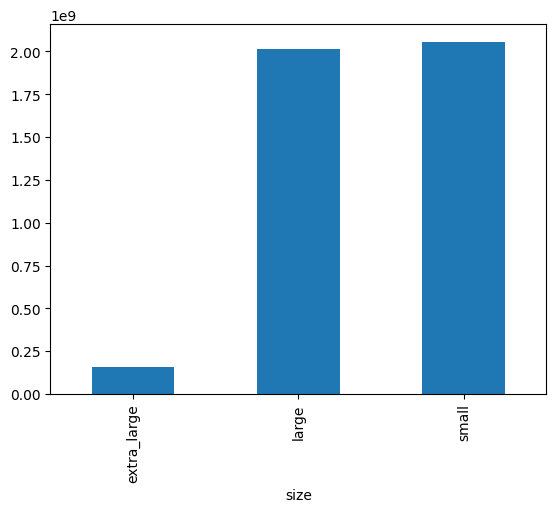

In [86]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

It looks like small avocados were the most-purchased size, but large avocados were a close second.

*Visualize the change in avocado sales over three years: Line Plot*

- *Line plots* are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. 
- They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point.

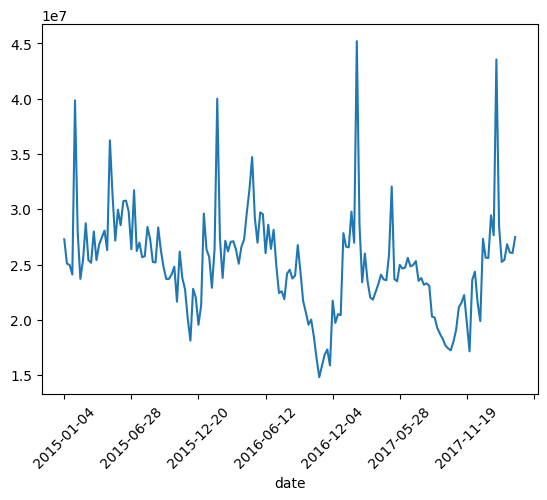

In [87]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line", rot=45)

# Show the plot
plt.show()

It looks like the number of avocados spikes around the same time each year.

*Avocado supply and demand: Scatter Plots*

- Scatter plots are ideal for visualizing relationships between numerical variables. 
- Let's compare the *number of avocados sold to average price* and see if they're at all related. If they're related, we may be able to use one number to predict the other.

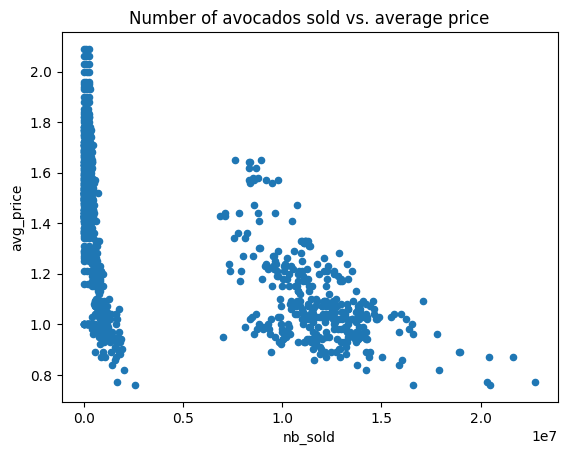

In [88]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(kind="scatter", x="nb_sold", y="avg_price", title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

 It looks like when more avocados are sold, prices go down. However, this doesn't mean that fewer sales causes higher prices - we can only tell that they're correlated with each other.

*Price of conventional vs. organic avocados*

- Creating* multiple plots* for different subsets of data allows you to compare groups.

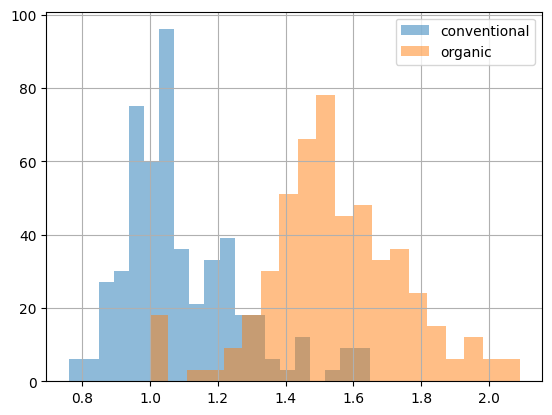

In [89]:
# Histogram of conventional avg_price 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Histogram of organic avg_price
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

We can see that on average, organic avocados are more expensive than conventional ones, but their price distributions have some overlap.

**Missing values**

       date   type   year  avg_price   size  nb_sold
0     False  False  False      False  False    False
1     False  False  False      False  False    False
2     False  False  False      False  False    False
3     False  False  False      False  False    False
4     False  False  False      False  False    False
...     ...    ...    ...        ...    ...      ...
1009  False  False  False      False  False    False
1010  False  False  False      False  False    False
1011  False  False  False      False  False    False
1012  False  False  False      False  False    False
1013  False  False  False      False  False    False

[1014 rows x 6 columns]
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


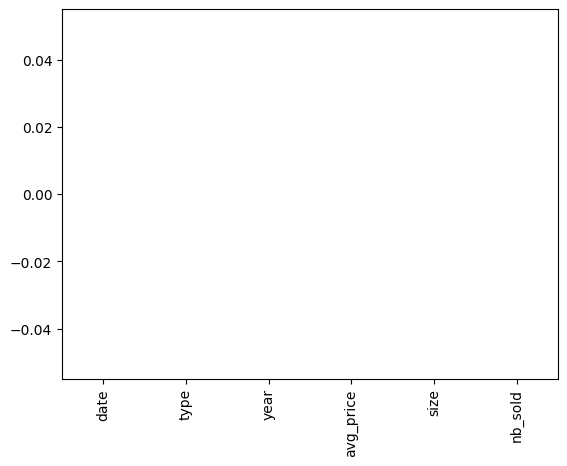

In [93]:
# Check individual values for missing values
print(avocados.isna())

# Check each column for missing values
print(avocados.isna().any())

# Bar plot of missing values by variable
avocados.isna().sum().plot(kind="bar")

# Show plot
plt.show()

**Creating DataFrames**

*List of dictionaries*

In [94]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


*Dictionary of lists*

In [95]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096
